In [1]:
import mysql.connector as mysql
import database as db
import csv, sys
import image_generator
import feature_extractor
import numpy as np
import os

In [2]:
myDB = db.connect_db("inference")
list_model = ["mobilenet_v1", "inception_v4", "resnet_v1_152"]

In [3]:
from __future__ import division
#import sys
import os
import csv
from tqdm import tqdm
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
# Import datasets, classifiers and performance metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from math import ceil
import util
from threading import Thread
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NearMiss
#-------------------------------
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.naive_bayes import GaussianNB

In [4]:
import premodel
pm = premodel.Premodel('Top-1')

In [5]:
amount_images = 4999 #changes the number of input images
list_premodels = ([('log_reg', 'log_reg', 'log_reg')])
data, first_level_data, second_level_data, third_level_data = pm.cv_training_data(amount_images)
feature_list = ['n_of_keypoints', 'avg_perc_brightness', 'contrast', 'area_by_perim', 'aspect_ratio', 'edge_length1', 'hue1']

<font size="5">**Preparing the data and building classifiers**</font>
<br /><br />
<font size="3">This part of the code is based on the CV_fold_worker() function from authors' code. Here we obtain the features data from csv file, transform it and pass it to classifiers. Then, feature importance in both classifiers is evaluated for each chunk using built-in functions from sklearn library.      
</font>

Logistic Regression, chunk: range(0, 500)
Feature: n_of_keypoints, Score: -0.5309041656518947
Feature: contrast, Score: -0.02101725671361786
Feature: aspect_ratio, Score: -0.017824935043042778
Feature: hue1, Score: 8.380237672494595e-05
Feature: area_by_perim, Score: 0.0017303693194502634
Feature: avg_perc_brightness, Score: 0.015066823940582896
Feature: edge_length1, Score: 0.04098381000241397


C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


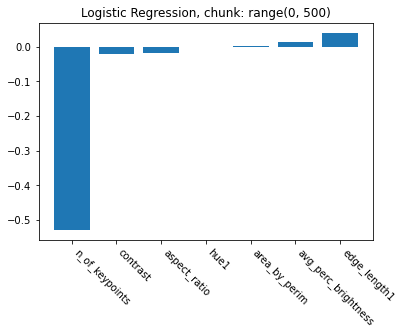

Decision Tree, chunk: range(0, 500)
Feature: hue1, Score: 0.0
Feature: area_by_perim, Score: 0.005557871349617124
Feature: avg_perc_brightness, Score: 0.007402129583460226
Feature: aspect_ratio, Score: 0.008967168951428031
Feature: contrast, Score: 0.011047800151260211
Feature: edge_length1, Score: 0.0630433458202233
Feature: n_of_keypoints, Score: 0.903981684144011


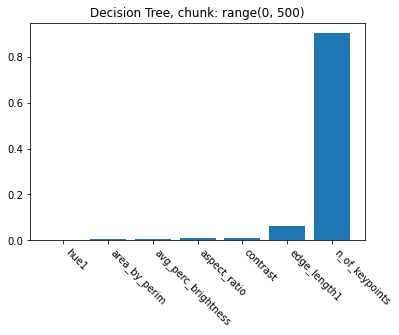

Logistic Regression, chunk: range(500, 1000)
Feature: n_of_keypoints, Score: -0.5223052084723354
Feature: contrast, Score: -0.01965465546705901
Feature: aspect_ratio, Score: -0.018112676547591397
Feature: hue1, Score: 4.9304317934372894e-05
Feature: avg_perc_brightness, Score: 0.008331933605852188
Feature: area_by_perim, Score: 0.01015291699984885
Feature: edge_length1, Score: 0.049125846266715435


C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


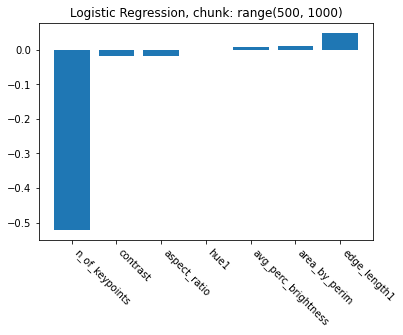

Decision Tree, chunk: range(500, 1000)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.006263708649221073
Feature: area_by_perim, Score: 0.007385857319820499
Feature: aspect_ratio, Score: 0.009837338463192447
Feature: contrast, Score: 0.010570918530300148
Feature: edge_length1, Score: 0.0476308550267909
Feature: n_of_keypoints, Score: 0.9183113220106748


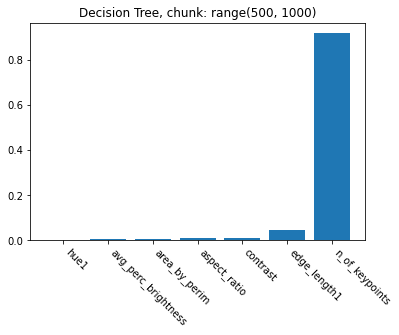

Logistic Regression, chunk: range(1000, 1500)
Feature: n_of_keypoints, Score: -0.5626618423768983
Feature: aspect_ratio, Score: -0.044018048830768965
Feature: contrast, Score: -0.04100621624469083
Feature: hue1, Score: -0.021785940237042285
Feature: avg_perc_brightness, Score: -0.015239699738756954
Feature: area_by_perim, Score: -0.014323064406458573
Feature: edge_length1, Score: 0.06537405051418037


C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


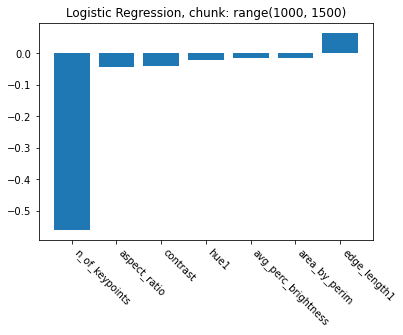

Decision Tree, chunk: range(1000, 1500)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.006437442670894118
Feature: area_by_perim, Score: 0.008615245573495819
Feature: aspect_ratio, Score: 0.008686452447609985
Feature: contrast, Score: 0.010220261492879183
Feature: edge_length1, Score: 0.058565695128506796
Feature: n_of_keypoints, Score: 0.9074749026866142


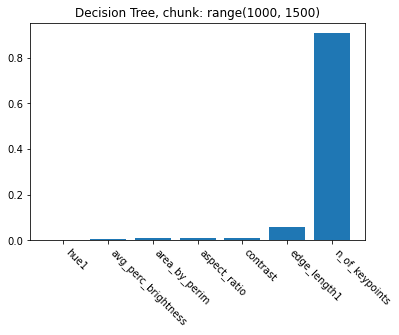

Logistic Regression, chunk: range(1500, 2000)
Feature: n_of_keypoints, Score: -0.5637950016807685
Feature: contrast, Score: -0.05560878457328601
Feature: aspect_ratio, Score: -0.04217157465811161
Feature: hue1, Score: -0.025507712283914966
Feature: avg_perc_brightness, Score: -0.01703844758750997
Feature: area_by_perim, Score: -0.012264383671622454
Feature: edge_length1, Score: 0.04898779629676151


C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


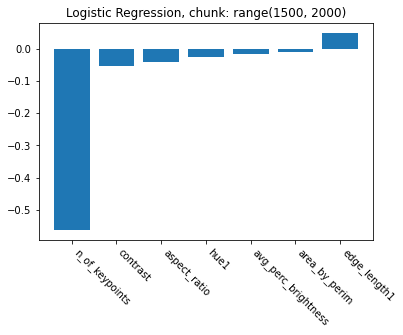

Decision Tree, chunk: range(1500, 2000)
Feature: hue1, Score: 0.0
Feature: aspect_ratio, Score: 0.0037597874872955625
Feature: avg_perc_brightness, Score: 0.010003757877574631
Feature: contrast, Score: 0.011902107515344344
Feature: area_by_perim, Score: 0.014224847304199453
Feature: edge_length1, Score: 0.052881149707111365
Feature: n_of_keypoints, Score: 0.9072283501084748


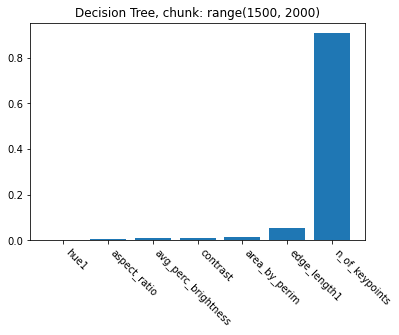

Logistic Regression, chunk: range(2000, 2500)
Feature: n_of_keypoints, Score: -0.5351832485754043
Feature: contrast, Score: -0.02819195516634466
Feature: aspect_ratio, Score: -0.02197809544298815
Feature: hue1, Score: -2.9867401894174235e-05
Feature: area_by_perim, Score: 0.008429891175548009
Feature: avg_perc_brightness, Score: 0.01645859095564436
Feature: edge_length1, Score: 0.05380528054304231


C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


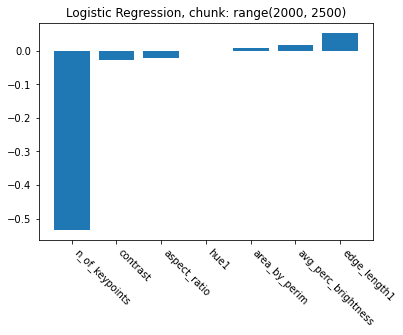

Decision Tree, chunk: range(2000, 2500)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.0033451958842362494
Feature: aspect_ratio, Score: 0.0065048739216791674
Feature: area_by_perim, Score: 0.006918174826147758
Feature: contrast, Score: 0.011019344049418112
Feature: edge_length1, Score: 0.038495182902944375
Feature: n_of_keypoints, Score: 0.9337172284155743


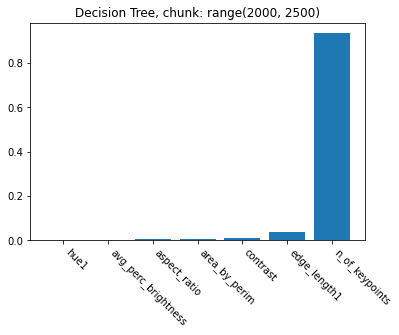

Logistic Regression, chunk: range(2500, 3000)
Feature: n_of_keypoints, Score: -0.5294875207310084
Feature: contrast, Score: -0.027798703896197516
Feature: aspect_ratio, Score: -0.017947362092783088
Feature: hue1, Score: 4.987558071812397e-05
Feature: area_by_perim, Score: 0.0012478308134885505
Feature: avg_perc_brightness, Score: 0.006890398063125572
Feature: edge_length1, Score: 0.05622329339763591


C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


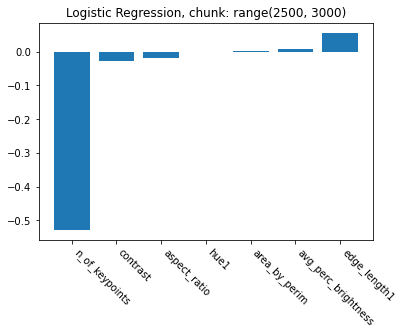

Decision Tree, chunk: range(2500, 3000)
Feature: hue1, Score: 0.0
Feature: contrast, Score: 0.004103623466653973
Feature: avg_perc_brightness, Score: 0.007278745975058087
Feature: aspect_ratio, Score: 0.00863540208250823
Feature: area_by_perim, Score: 0.013081238999541608
Feature: edge_length1, Score: 0.057554861172429965
Feature: n_of_keypoints, Score: 0.9093461283038081


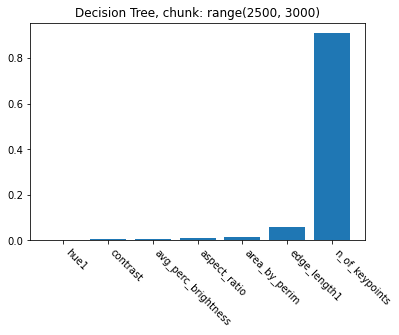

Logistic Regression, chunk: range(3000, 3500)
Feature: n_of_keypoints, Score: -0.5680137532860003
Feature: contrast, Score: -0.052097343330079975
Feature: aspect_ratio, Score: -0.03773642868237369
Feature: hue1, Score: -0.024219337929776083
Feature: area_by_perim, Score: -0.018499525428248672
Feature: avg_perc_brightness, Score: -0.012462705729263793
Feature: edge_length1, Score: 0.054672372969419236


C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


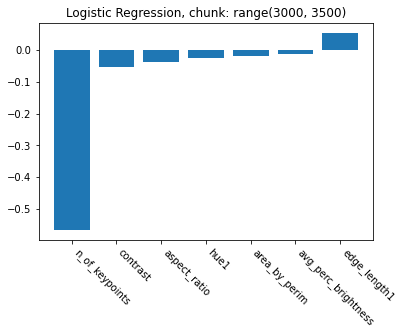

Decision Tree, chunk: range(3000, 3500)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.0031959391426592096
Feature: aspect_ratio, Score: 0.006842068661735711
Feature: area_by_perim, Score: 0.00762193445306815
Feature: contrast, Score: 0.013744577937487215
Feature: edge_length1, Score: 0.07232791567738664
Feature: n_of_keypoints, Score: 0.8962675641276631


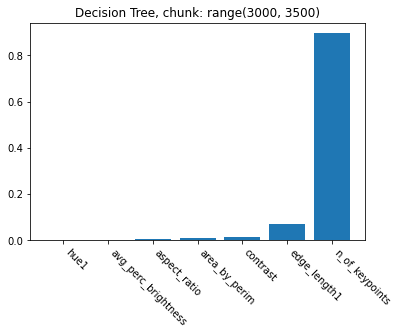

Logistic Regression, chunk: range(3500, 4000)
Feature: n_of_keypoints, Score: -0.5629666274224163
Feature: contrast, Score: -0.0499678142594663
Feature: aspect_ratio, Score: -0.04120217634551383
Feature: hue1, Score: -0.02313229646900408
Feature: area_by_perim, Score: -0.01744241599685947
Feature: avg_perc_brightness, Score: -0.015089035952253796
Feature: edge_length1, Score: 0.055355889073228505


C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


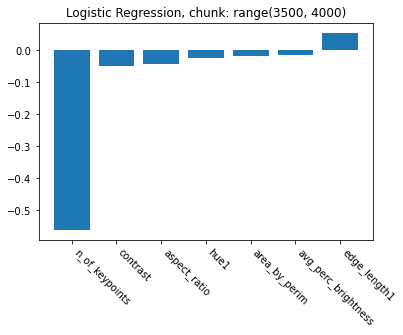

Decision Tree, chunk: range(3500, 4000)
Feature: hue1, Score: 0.0
Feature: aspect_ratio, Score: 0.005501020107898161
Feature: contrast, Score: 0.008337860550991916
Feature: area_by_perim, Score: 0.008681863102699451
Feature: avg_perc_brightness, Score: 0.00992586490749528
Feature: edge_length1, Score: 0.05845044727738249
Feature: n_of_keypoints, Score: 0.9091029440535328


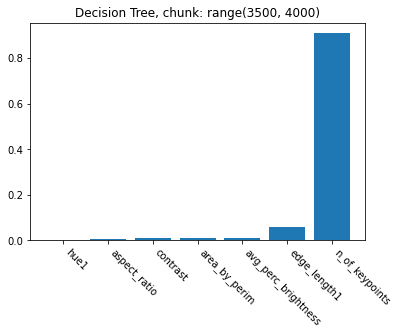

Logistic Regression, chunk: range(4000, 4500)
Feature: n_of_keypoints, Score: -0.5606677243677711
Feature: contrast, Score: -0.045062396887956546
Feature: aspect_ratio, Score: -0.04080742343280081
Feature: hue1, Score: -0.021128078470981356
Feature: area_by_perim, Score: -0.011044796188267855
Feature: avg_perc_brightness, Score: -0.006412964210068512
Feature: edge_length1, Score: 0.06621631845258182


C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


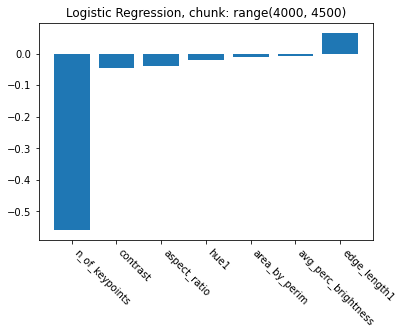

Decision Tree, chunk: range(4000, 4500)
Feature: hue1, Score: 0.0
Feature: contrast, Score: 0.008016130937150739
Feature: aspect_ratio, Score: 0.008744870107619152
Feature: avg_perc_brightness, Score: 0.008915315639821874
Feature: area_by_perim, Score: 0.012220136490582154
Feature: edge_length1, Score: 0.05699218846384193
Feature: n_of_keypoints, Score: 0.9051113583609841


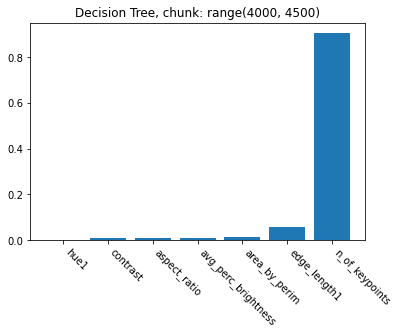

Logistic Regression, chunk: range(4500, 4999)
Feature: n_of_keypoints, Score: -0.5288625552099473
Feature: contrast, Score: -0.02690336884638694
Feature: aspect_ratio, Score: -0.02225483093752254
Feature: hue1, Score: 3.41291095438277e-05
Feature: area_by_perim, Score: 0.008831766323966771
Feature: avg_perc_brightness, Score: 0.011817660048634028
Feature: edge_length1, Score: 0.037718323642438996


C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


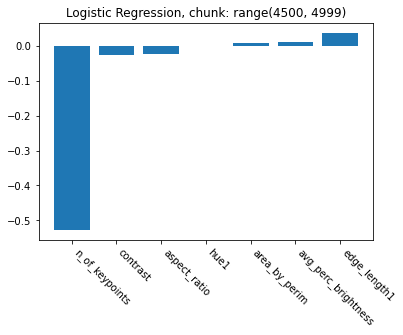

Decision Tree, chunk: range(4500, 4999)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.007173754442764906
Feature: aspect_ratio, Score: 0.008329172477402171
Feature: area_by_perim, Score: 0.008394077084660875
Feature: contrast, Score: 0.01432475139179488
Feature: edge_length1, Score: 0.06341318661623864
Feature: n_of_keypoints, Score: 0.8983650579871385


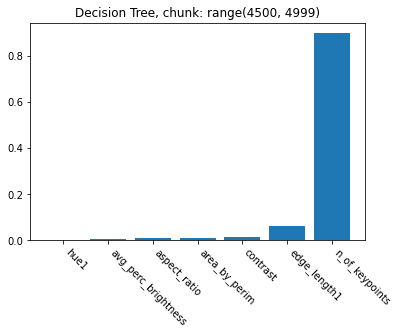

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree
for counter,(first_level_machine, second_level_machine, third_level_machine) in enumerate(list_premodels):
            # Split training data in k-fold chunks
            # Minimum needs to be 2
            k_fold = 10
            worker_threads = list()
            chunk_size = int(ceil(len(data) / float(k_fold)))    
            # Create a new thread for each fold
            for i, (test_idx, train_idx) in enumerate(util.chunkise(range(len(data)), chunk_size)):
                return_wrapper = list()
                X_train, _ = util.list_split(data, train_idx, [0])

                Y_train, _ = util.list_split(data, test_idx, [0])
                Y_test_first_level, _ = util.list_split(first_level_data, test_idx, [0])
                Y_test_second_level, _ = util.list_split(second_level_data, test_idx, [0])
                Y_test_third_level, _ = util.list_split(third_level_data, test_idx, [0])

                X_test_first_level, _ = util.list_split(first_level_data, train_idx, [0])
                X_test_second_level, _ = util.list_split(second_level_data, train_idx, [0])
                X_test_third_level, _ = util.list_split(third_level_data, train_idx, [0])

                X_val_first_level = [X_test_first_level[i][1] for i in range(0,len(X_test_first_level))]
                Y_val_first_level = [Y_test_first_level[i][1] for i in range(0,len(Y_test_first_level))]

                X_val_second_level = [X_test_second_level[i][1] for i in range(0,len(X_test_second_level))]
                Y_val_second_level = [Y_test_second_level[i][1] for i in range(0,len(Y_test_second_level))]

                X_val_third_level = [X_test_third_level[i][1] for i in range(0,len(X_test_third_level))]
                Y_val_third_level = [Y_test_third_level[i][1] for i in range(0,len(Y_test_third_level))]

                list_predictions = []
                Y_train_second_level = []
                Y_train_second_level_position = []
                Y_train_third_level = []
                Y_train_third_level_position = []
                
                
                log_reg = LogisticRegression()                           #Logistic Regression feature importance
                #log_reg = LogisticRegression(class_weight = 'balanced')
                log_reg.fit(X_train, X_val_first_level)
                # Prediction
                predicted = log_reg.predict(Y_train)
                predicted = predicted.astype(int)
                importance = log_reg.coef_[0]
                d = dict(zip(feature_list, importance))
                d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
                # summarize feature importance
                print("Logistic Regression, chunk: {}".format(test_idx))
                for i,v in zip(d_sorted.keys(), d_sorted.values()):
                    print('Feature: {}, Score: {}'.format(i,v))
                # plot feature importance
                plt.title("Logistic Regression, chunk: {}".format(test_idx))
                plt.bar(d_sorted.keys(), d_sorted.values())
                plt.xticks(rotation=-45, ha='left')
                plt.show()
                
                
                regr_2 = DecisionTreeRegressor(max_depth=2)    #DT feature importance
                regr_5 = DecisionTreeRegressor(max_depth=5)
                regr_8 = DecisionTreeRegressor(max_depth=8)
                regr_12 = DecisionTreeRegressor(max_depth=12)
                regr_16 = DecisionTreeRegressor(max_depth=16)

                # Fit tree
                regr_2.fit(X_train, X_val_first_level)
                regr_5.fit(X_train, X_val_first_level)
                regr_8.fit(X_train, X_val_first_level)
                regr_12.fit(X_train, X_val_first_level)
                regr_16.fit(X_train, X_val_first_level)

                # Predict
                predicted_level_2 = regr_2.predict(Y_train)
                predicted_level_5 = regr_5.predict(Y_train)
                predicted_level_8 = regr_8.predict(Y_train)
                predicted_level_12 = regr_12.predict(Y_train)
                predicted_level_16 = regr_16.predict(Y_train)
                importance = regr_16.feature_importances_
                d = dict(zip(feature_list, importance))
                d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
                # Summarize feature importance
                print("Decision Tree, chunk: {}".format(test_idx))
                for i,v in zip(d_sorted.keys(), d_sorted.values()):
                    print('Feature: {}, Score: {}'.format(i,v))
                # Plot feature importance
                #importance.sort()
                plt.title("Decision Tree, chunk: {}".format(test_idx))
                plt.bar(d_sorted.keys(), d_sorted.values())
                plt.xticks(rotation=-45, ha='left')
                plt.show()

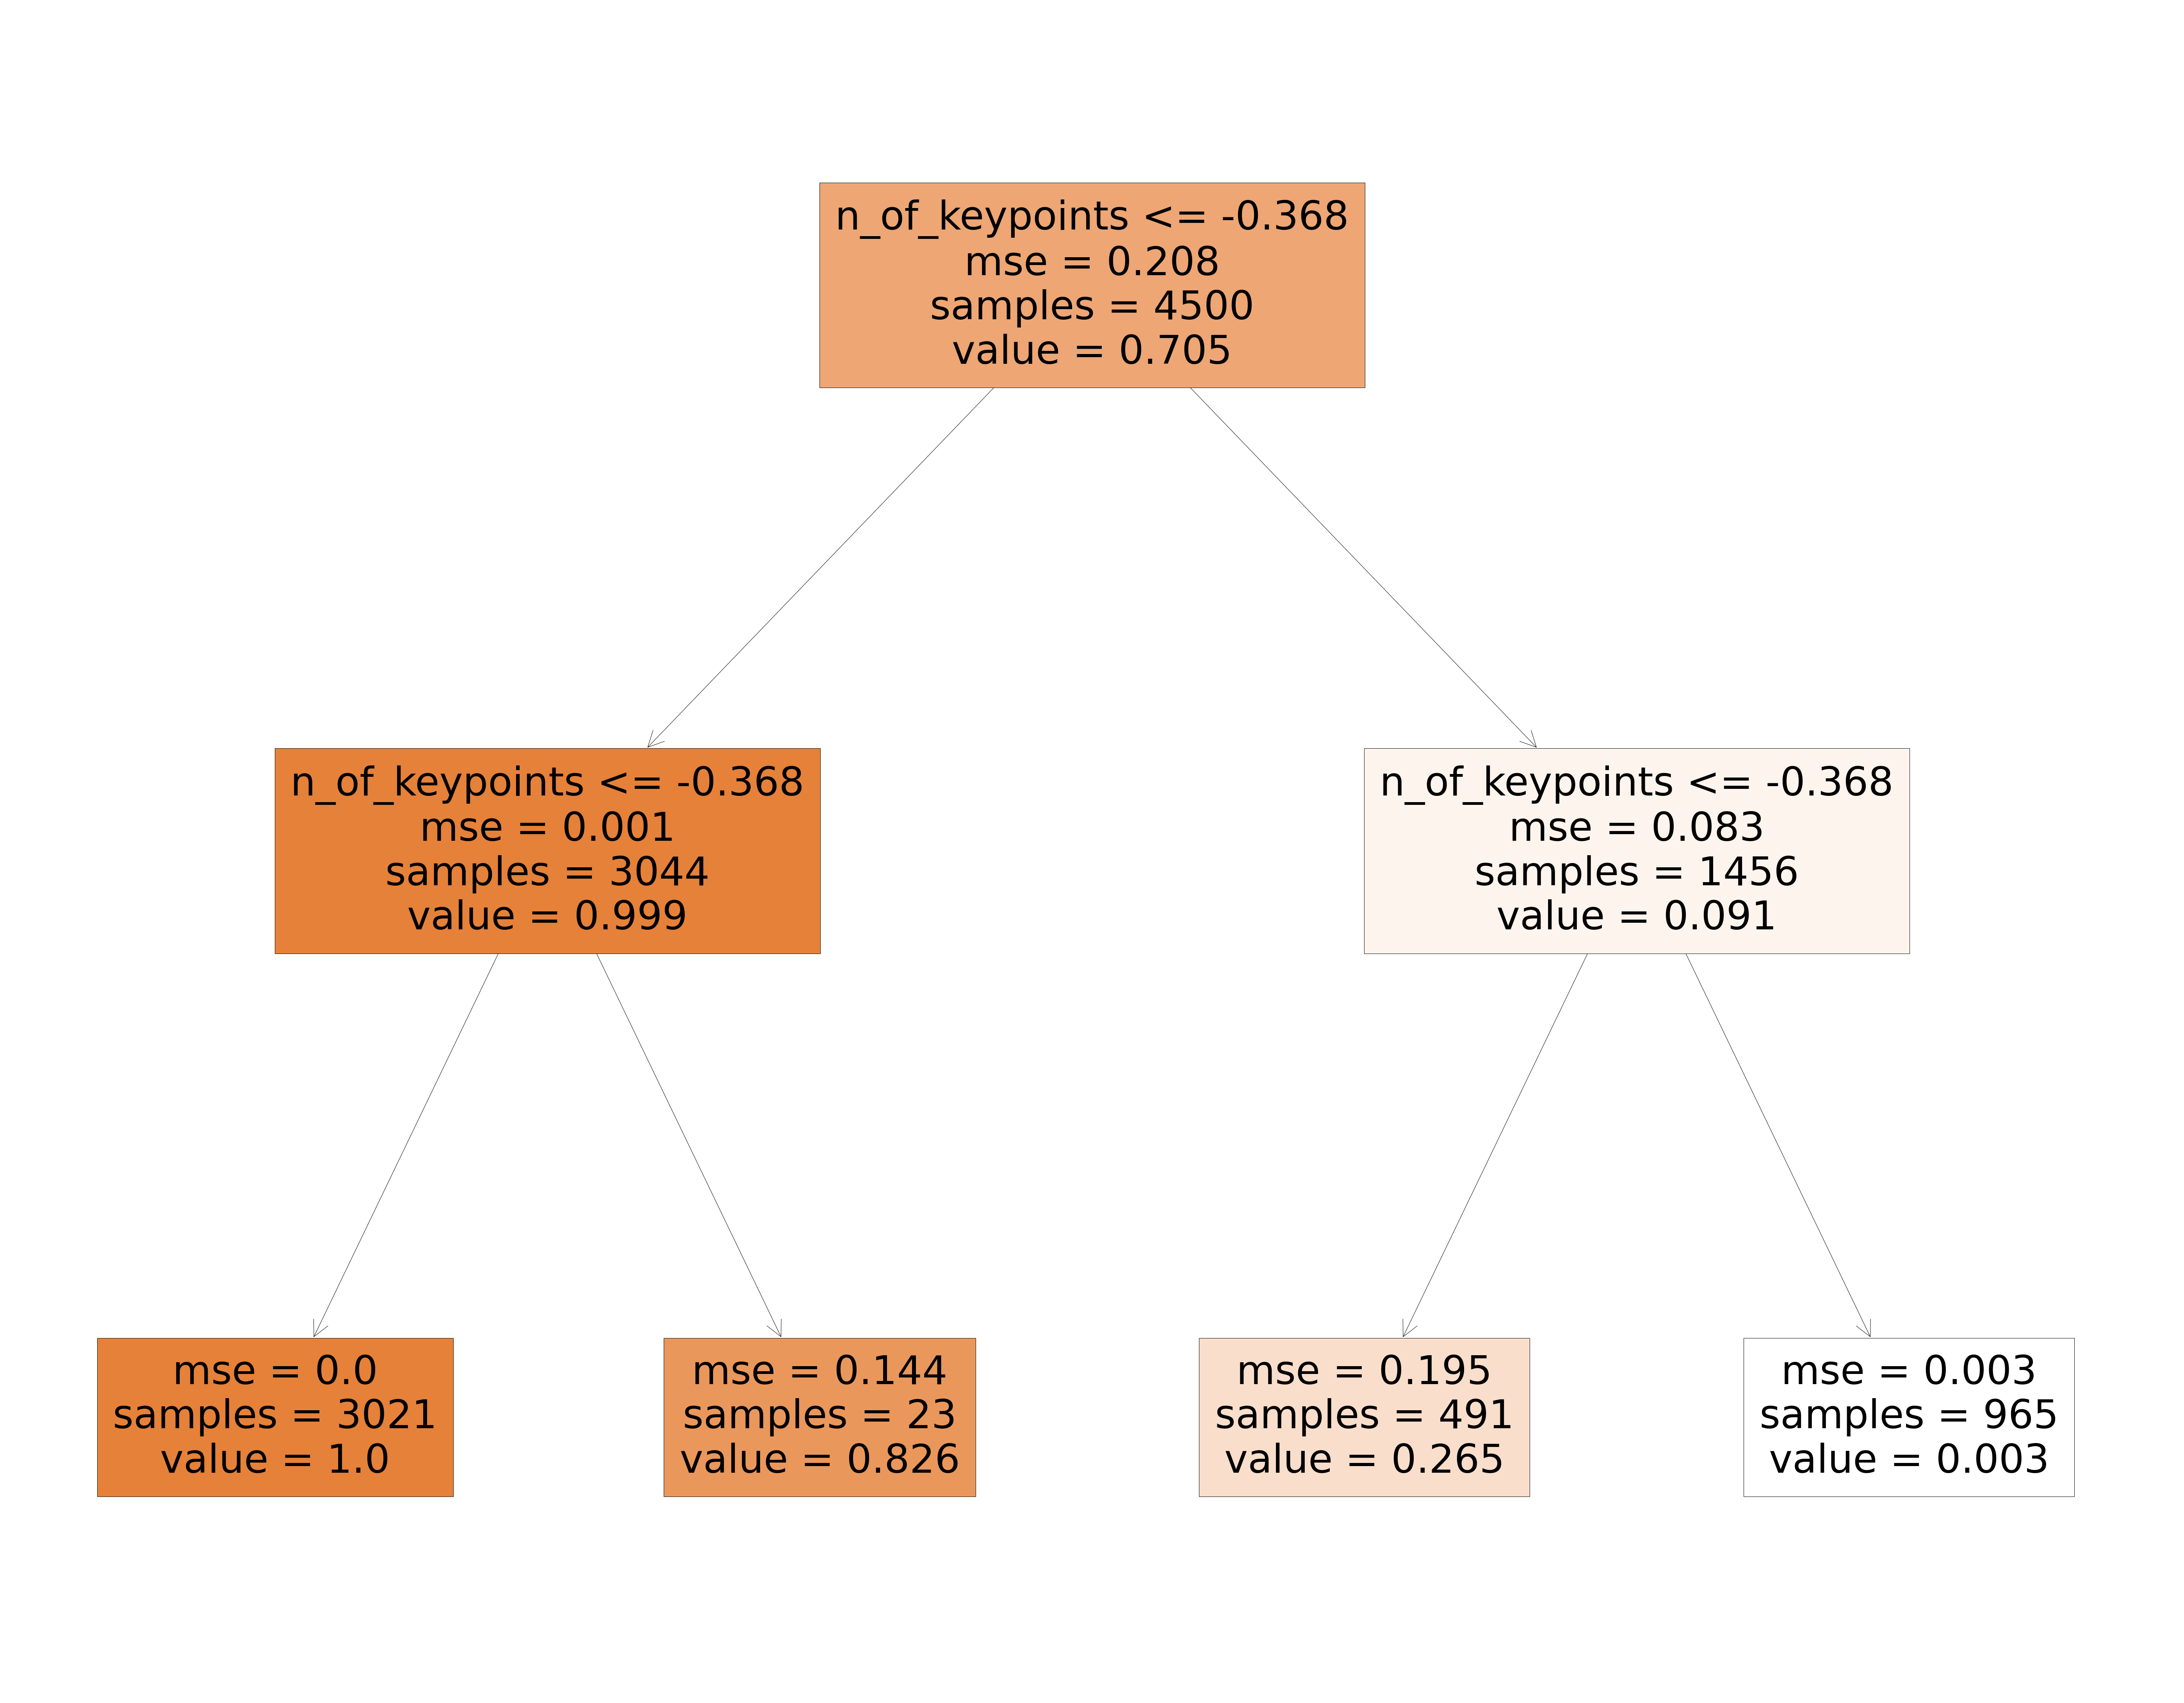

In [7]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(regr_2, feature_names=feature_list, filled=True)



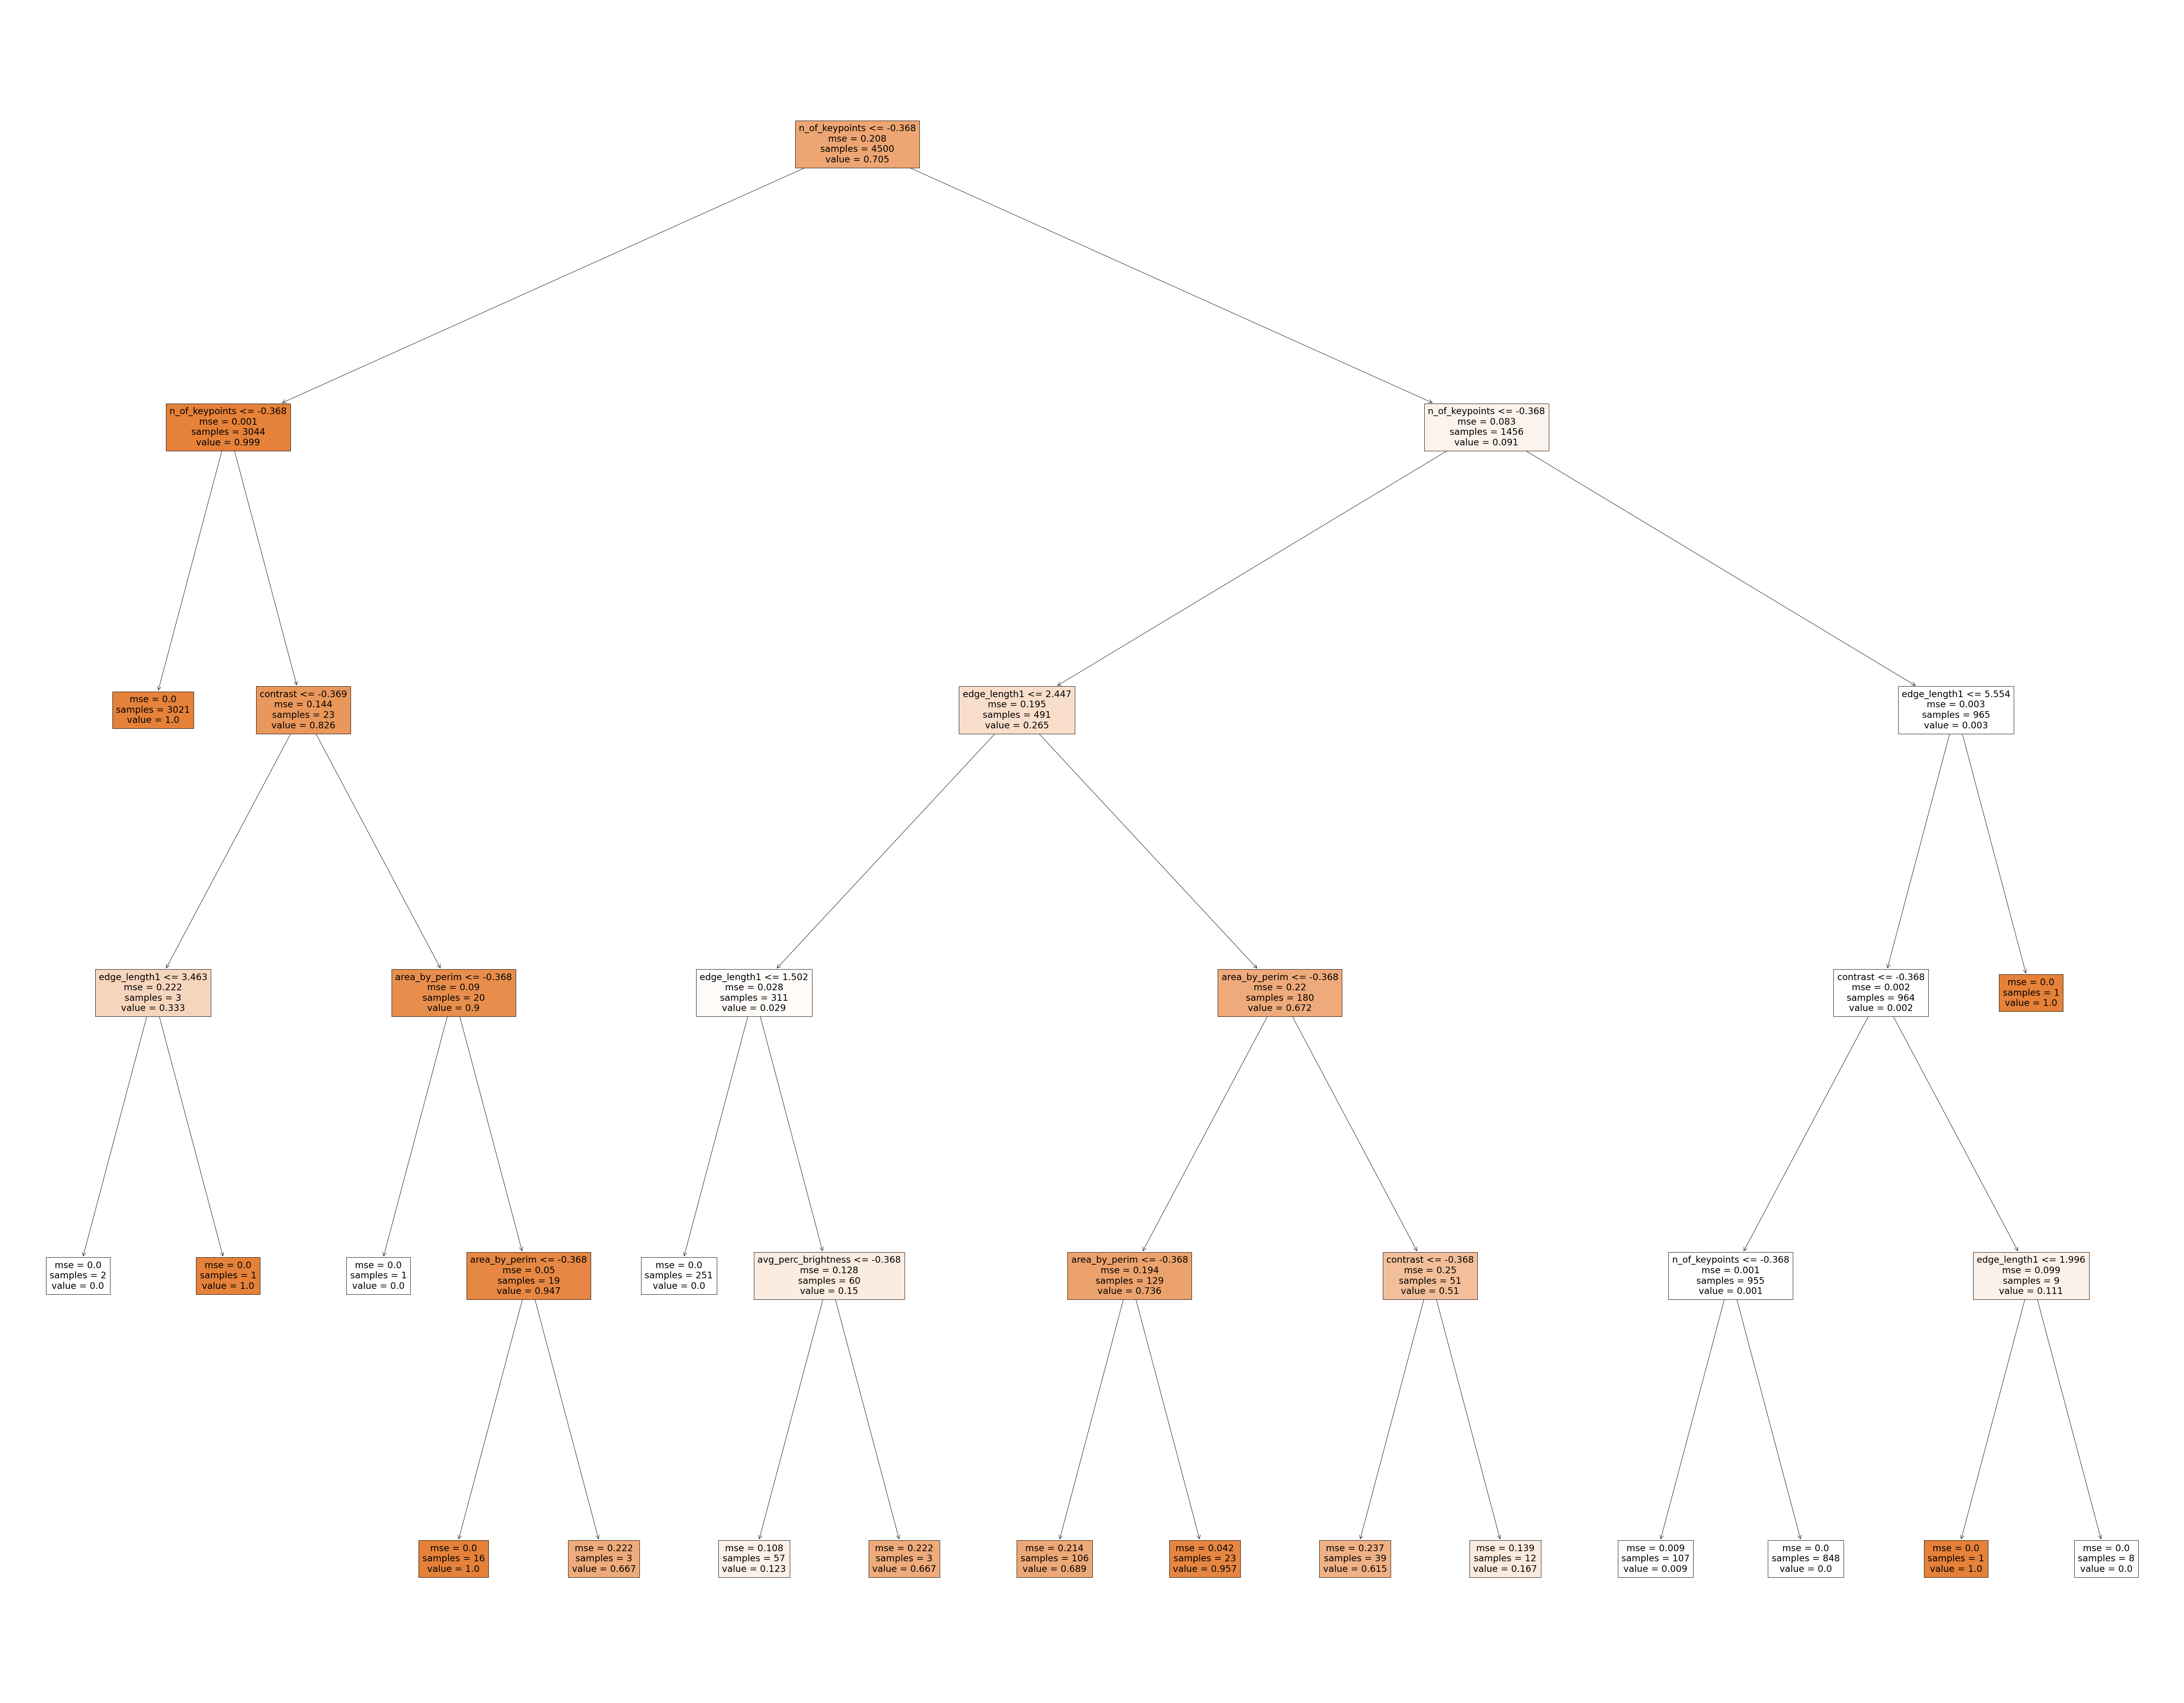

In [8]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(regr_5, feature_names=feature_list, filled=True)


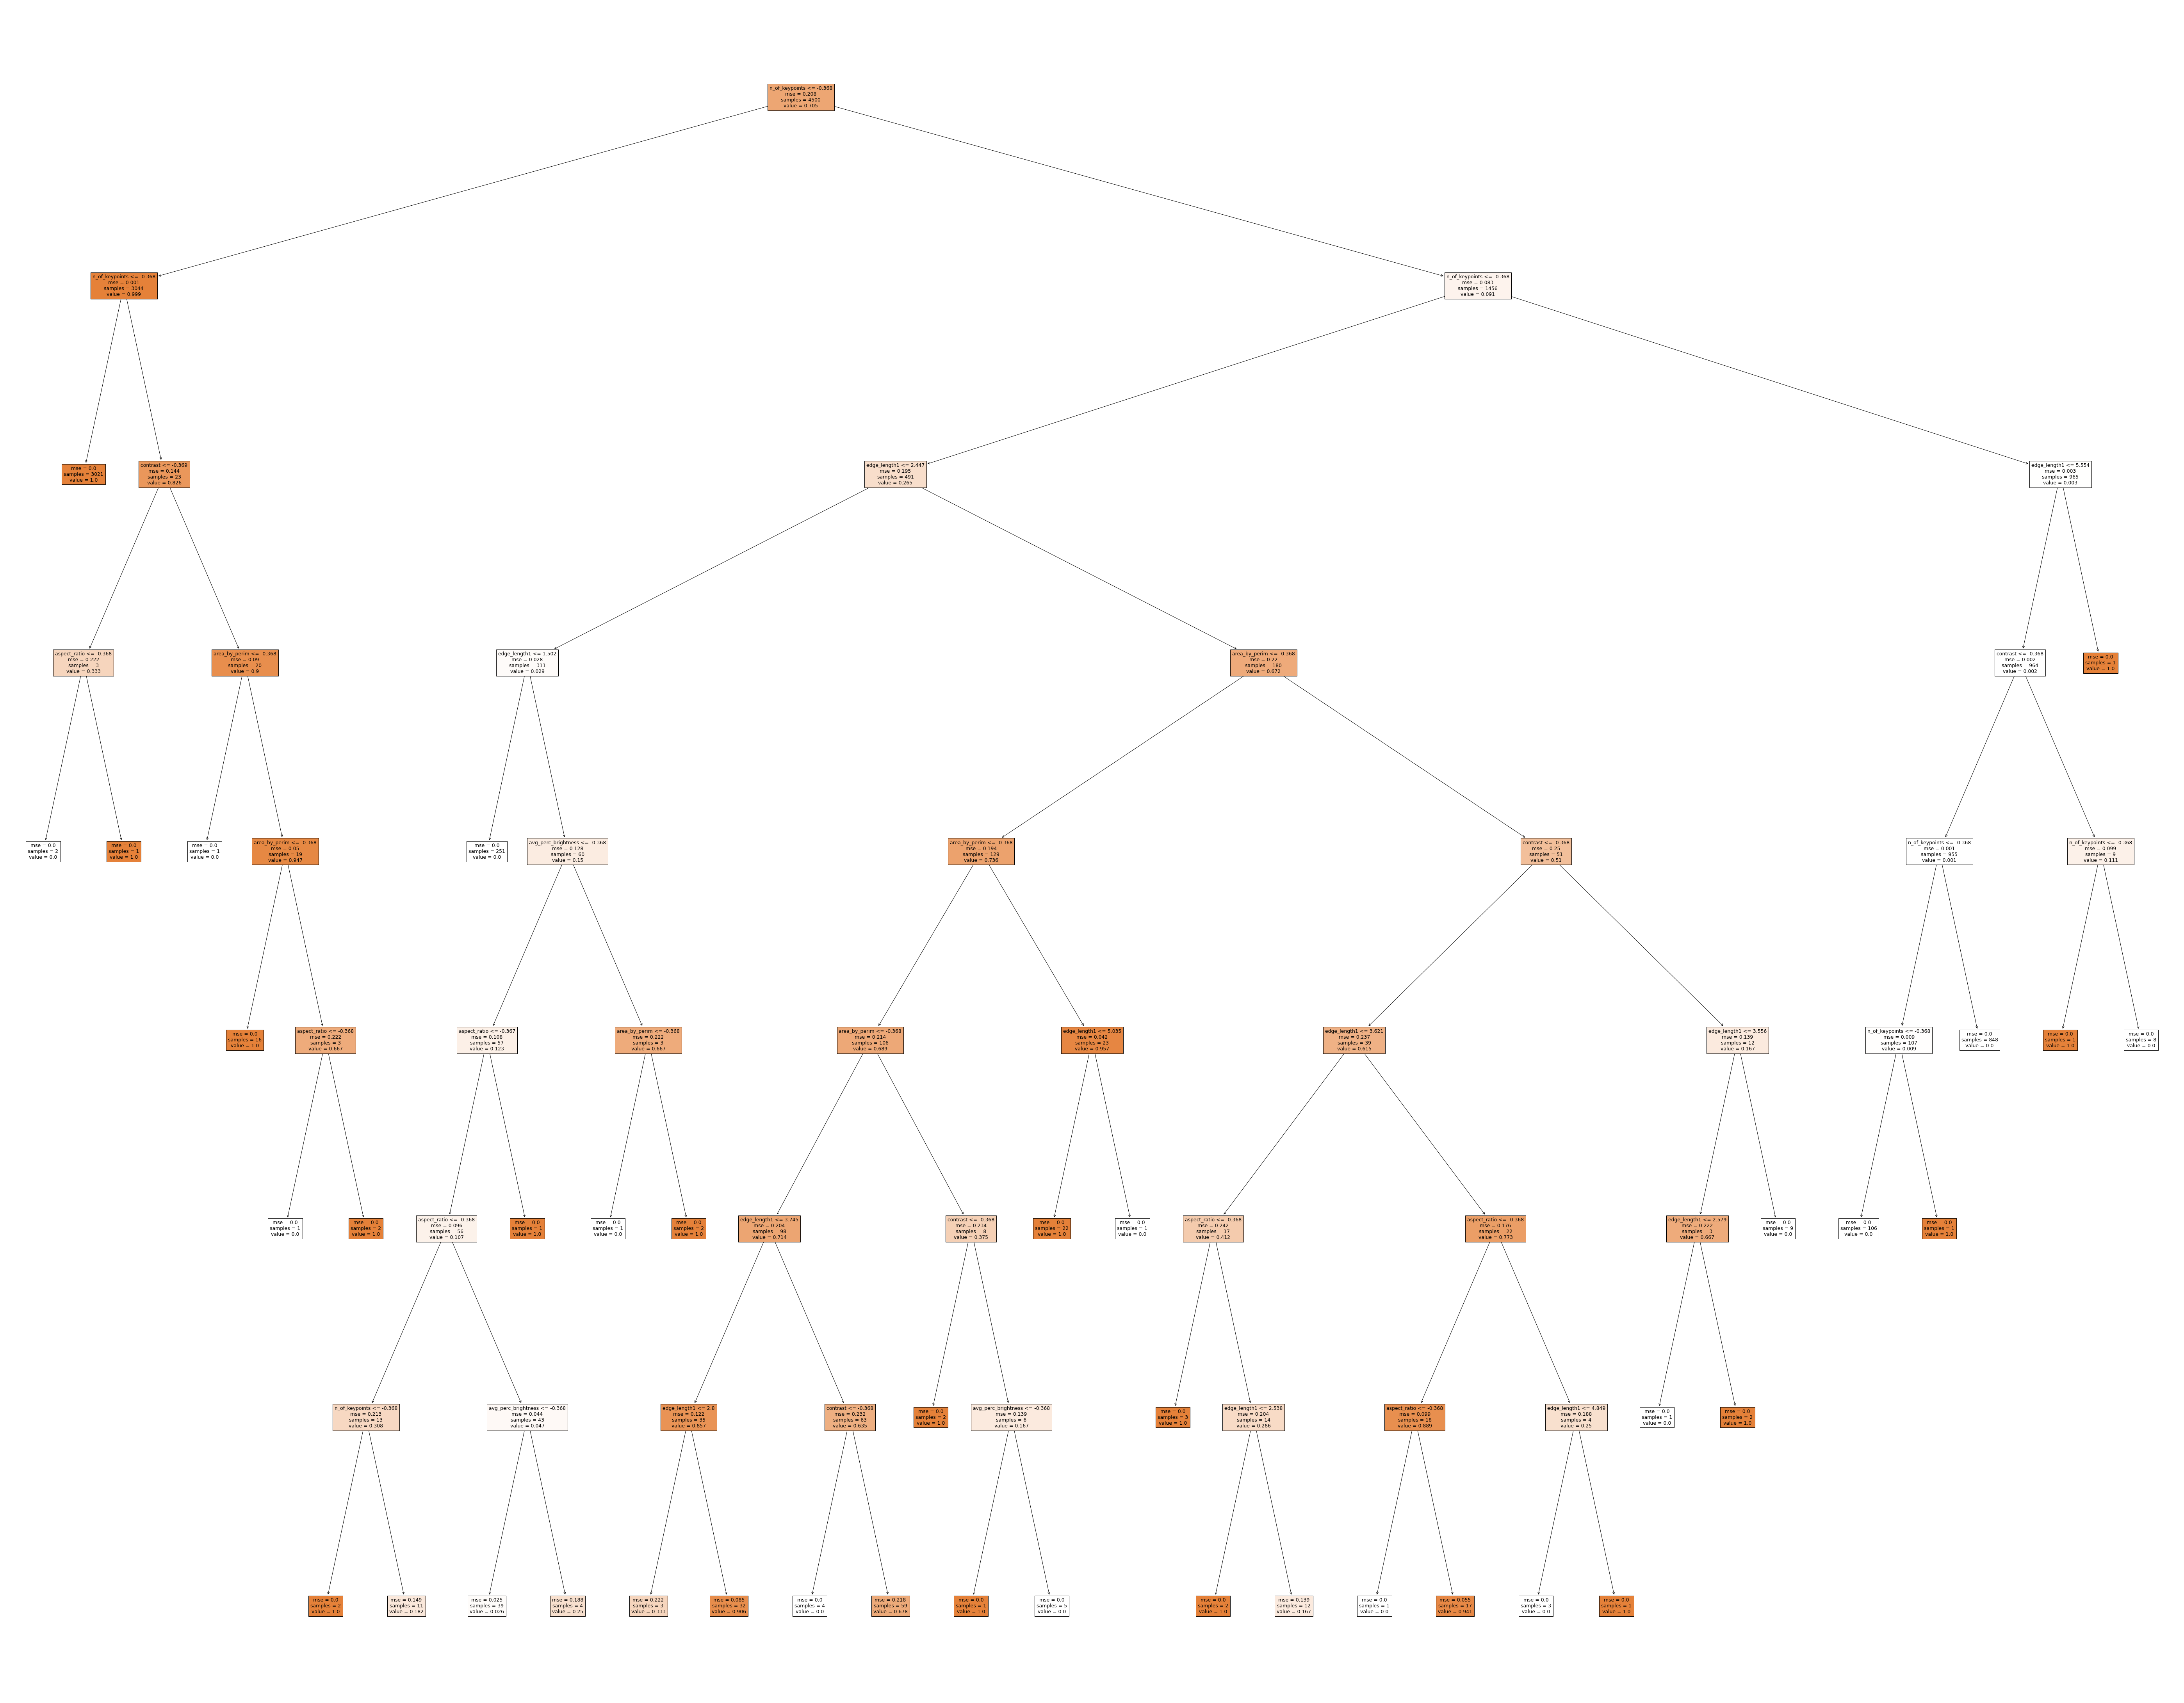

In [9]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(regr_8, feature_names=feature_list, filled=True)

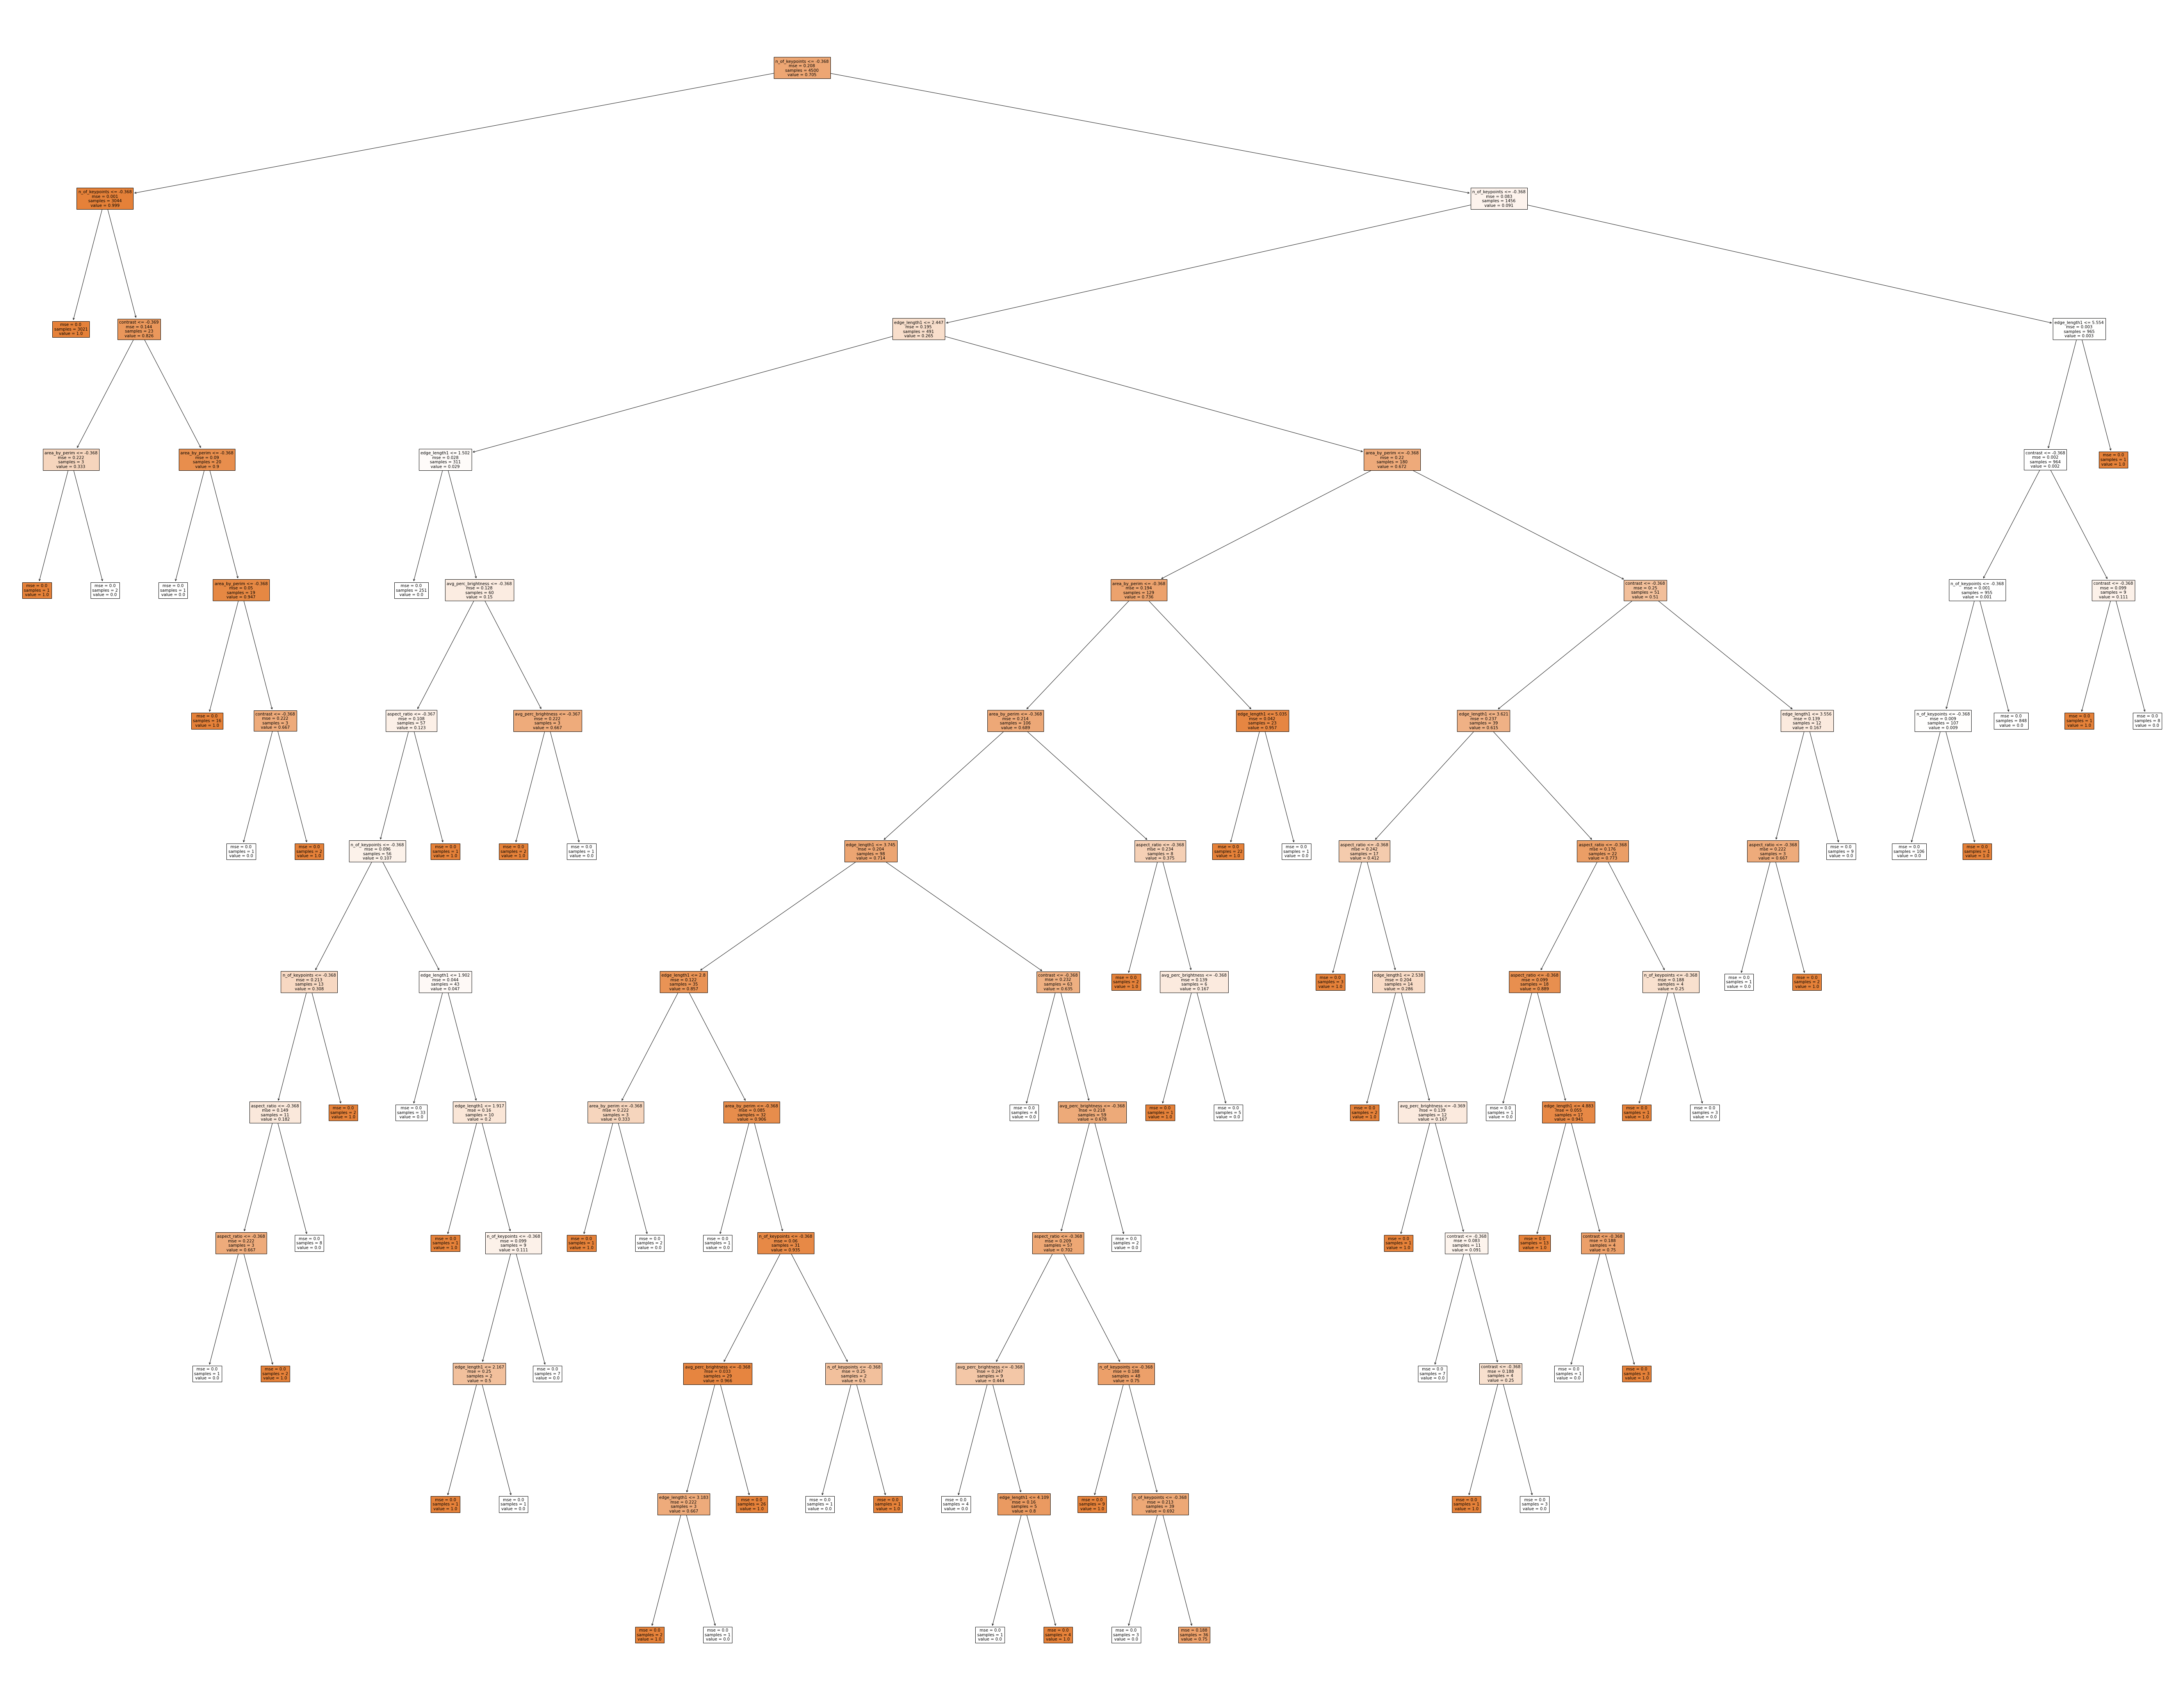

In [10]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(regr_12, feature_names=feature_list, filled=True)

In [11]:
fig = plt.figure(figsize=(200, 160))
_ = tree.plot_tree(regr_16, feature_names=feature_list, filled=True)

In [12]:
#fig.savefig("decistion_tree5000.png") #if you want to download the visualization of a tree

In [13]:
text_representation = tree.export_text(regr_16, feature_names=feature_list)
print(text_representation)

|--- n_of_keypoints <= -0.37
|   |--- n_of_keypoints <= -0.37
|   |   |--- value: [1.00]
|   |--- n_of_keypoints >  -0.37
|   |   |--- contrast <= -0.37
|   |   |   |--- aspect_ratio <= -0.37
|   |   |   |   |--- value: [0.00]
|   |   |   |--- aspect_ratio >  -0.37
|   |   |   |   |--- value: [1.00]
|   |   |--- contrast >  -0.37
|   |   |   |--- area_by_perim <= -0.37
|   |   |   |   |--- value: [0.00]
|   |   |   |--- area_by_perim >  -0.37
|   |   |   |   |--- area_by_perim <= -0.37
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- area_by_perim >  -0.37
|   |   |   |   |   |--- contrast <= -0.37
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- contrast >  -0.37
|   |   |   |   |   |   |--- value: [1.00]
|--- n_of_keypoints >  -0.37
|   |--- n_of_keypoints <= -0.37
|   |   |--- edge_length1 <= 2.45
|   |   |   |--- edge_length1 <= 1.50
|   |   |   |   |--- value: [0.00]
|   |   |   |--- edge_length1 >  1.50
|   |   |   |   |--- avg_perc_brightness <= -0.

In [14]:
# import matplotlib.pyplot as plt
# from sklearn import tree
# for counter,(first_level_machine, second_level_machine, third_level_machine) in enumerate(list_premodels):
#             # Split training data in k-fold chunks
#             # Minimum needs to be 2
#             k_fold = 10
#             worker_threads = list()
#             chunk_size = int(ceil(len(data) / float(k_fold)))    
#             # Create a new thread for each fold
#             for i, (test_idx, train_idx) in enumerate(util.chunkise(range(len(data)), chunk_size)):
#                 return_wrapper = list()
#                 X_train, _ = util.list_split(data, train_idx, [0])

#                 Y_train, _ = util.list_split(data, test_idx, [0])
#                 Y_test_first_level, _ = util.list_split(first_level_data, test_idx, [0])
#                 Y_test_second_level, _ = util.list_split(second_level_data, test_idx, [0])
#                 Y_test_third_level, _ = util.list_split(third_level_data, test_idx, [0])

#                 X_test_first_level, _ = util.list_split(first_level_data, train_idx, [0])
#                 X_test_second_level, _ = util.list_split(second_level_data, train_idx, [0])
#                 X_test_third_level, _ = util.list_split(third_level_data, train_idx, [0])

#                 X_val_first_level = [X_test_first_level[i][1] for i in range(0,len(X_test_first_level))]
#                 Y_val_first_level = [Y_test_first_level[i][1] for i in range(0,len(Y_test_first_level))]

#                 X_val_second_level = [X_test_second_level[i][1] for i in range(0,len(X_test_second_level))]
#                 Y_val_second_level = [Y_test_second_level[i][1] for i in range(0,len(Y_test_second_level))]

#                 X_val_third_level = [X_test_third_level[i][1] for i in range(0,len(X_test_third_level))]
#                 Y_val_third_level = [Y_test_third_level[i][1] for i in range(0,len(Y_test_third_level))]

#                 list_predictions = []
#                 Y_train_second_level = []
#                 Y_train_second_level_position = []
#                 Y_train_third_level = []
#                 Y_train_third_level_position = []
                
                
#                 log_reg = LogisticRegression()                           #Logistic Regression feature importance
#                 #log_reg = LogisticRegression(class_weight = 'balanced')
#                 log_reg.fit(X_train, X_val_first_level)
#                 # Prediction
#                 predicted = log_reg.predict(Y_train)
#                 predicted = predicted.astype(int)
#                 importance = log_reg.coef_[0]
#                 d = dict(zip(feature_list, importance))
#                 d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
#                 # summarize feature importance
#                 print("Logistic Regression, chunk: {}".format(test_idx))
#                 for i,v in zip(d_sorted.keys(), d_sorted.values()):
#                     print('Feature: {}, Score: {}'.format(i,v))
#                 # plot feature importance
#                 plt.title("Logistic Regression, chunk: {}".format(test_idx))
#                 plt.bar(d_sorted.keys(), d_sorted.values())
#                 plt.xticks(rotation=-45, ha='left')
#                 plt.show()
                
                
#                 regr_2 = DecisionTreeRegressor(max_depth=2)    #DT feature importance
#                 regr_5 = DecisionTreeRegressor(max_depth=5)
#                 regr_8 = DecisionTreeRegressor(max_depth=8)
#                 regr_12 = DecisionTreeRegressor(max_depth=12)
#                 regr_16 = DecisionTreeRegressor(max_depth=16)

#                 # Fit tree
#                 regr_2.fit(X_train, X_val_first_level)
#                 regr_5.fit(X_train, X_val_first_level)
#                 regr_8.fit(X_train, X_val_first_level)
#                 regr_12.fit(X_train, X_val_first_level)
#                 regr_16.fit(X_train, X_val_first_level)

#                 # Predict
#                 predicted_level_2 = regr_2.predict(Y_train)
#                 predicted_level_5 = regr_5.predict(Y_train)
#                 predicted_level_8 = regr_8.predict(Y_train)
#                 predicted_level_12 = regr_12.predict(Y_train)
#                 predicted_level_16 = regr_16.predict(Y_train)
#                 importance = regr_16.feature_importances_
#                 d = dict(zip(feature_list, importance))
#                 d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
#                 # Summarize feature importance
#                 print("Decision Tree, chunk: {}".format(test_idx))
#                 for i,v in zip(d_sorted.keys(), d_sorted.values()):
#                     print('Feature: {}, Score: {}'.format(i,v))
#                 # Plot feature importance
#                 #importance.sort()
#                 plt.title("Decision Tree, chunk: {}".format(test_idx))
#                 plt.bar(d_sorted.keys(), d_sorted.values())
#                 plt.xticks(rotation=-45, ha='left')
#                 plt.show()